## Strings of digits with uniformly distributed quantities of each element

### Idea
- generate every integer partition of the string length (limited by number of digits)
- choose a number of max occurrences
- return one corresponding partition

https://en.wikipedia.org/wiki/Partition_(number_theory)

Obs: number of partitions [increases exponentialy](https://en.wikipedia.org/wiki/Partition_(number_theory)#Partition_function).

In [108]:
import numpy as np
from numpy.random import randint, shuffle, choice

def restricted_partitions(n, size, I=1):
    """ modified from https://stackoverflow.com/a/44209393/2853953 """
    if size > 0:
        yield (n,)
        for i in range(I, n//2 + 1):
                for p in restricted_partitions(n-i, size-1, i):
                    yield (i,) + p

cache = {}

def gen_string(base, length):
    if (base,length) not in cache:
        cache[base,length] = list(restricted_partitions(length, base))
    partitions = cache[base,length]
    highest_qty = randint(length//2, length) + 1
    parts = [p for p in partitions if highest_qty in p]
    index = randint(len(parts))
    partition = parts[index]
    l = list(range(base))
    shuffle(l)
    s = []
    for i,x in enumerate(partition):
        s += x * [l[i]]
    shuffle(s)
    return s

In [148]:
# example partition
list(restricted_partitions(4,3))

[(4,), (1, 3), (1, 1, 2), (2, 2)]

In [152]:
# example string
gen_string(3, 20)

[1, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2]

### Testing the distribution of quantities

In [137]:
from collections import Counter
import matplotlib.pyplot as plt

def test(base, length, trials):
    """ plot quantities for each generated string """
    l = []
    for _ in range(trials):
        c = Counter()
        s = gen_string(base, length)
        for i in s:
            c[i] += 1
        l.append(max(c.values()))
    plt.hist(l,bins=100)

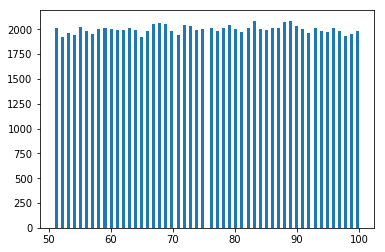

In [145]:
test(4,100,100000)

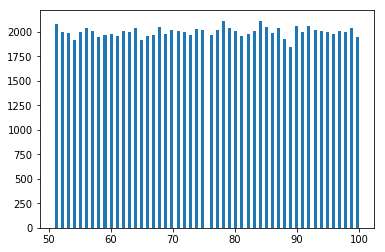

In [154]:
test(5,100,100000)

### Number of partitions

In [135]:
len(list(restricted_partitions(100,4)))

8037

In [146]:
len(list(restricted_partitions(100,5)))

46262

In [147]:
len(list(restricted_partitions(100,6)))

189509

In [153]:
len(list(restricted_partitions(100,7)))

596763